# Write a MATLAB/Python program to Character Segment of an image.

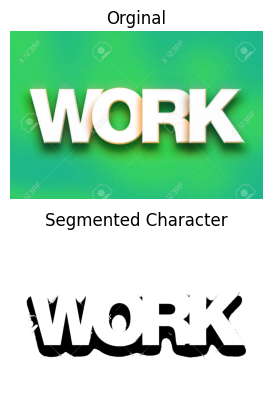

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def character_segmentation(image):
    # Convert the image to grayscale.
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to binarize the image.
    _, thresh_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    
    # Find the contours of the characters in the image.
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize a list to store the segmented characters.
    segmented_characters = []
    
    # Loop over the contours.
    for contour in contours:
        # Extract the bounding box of the contour.
        (x, y, w, h) = cv2.boundingRect(contour)
    
        # If the bounding box is large enough, then it is a character.
        if w * h > 100:
            # Crop the character from the image.
            character = thresh_image[y:y + h, x:x + w]
            # Append the character to the list of segmented characters.
            segmented_characters.append(character)
    
    return segmented_characters

# Read the image.
image = cv2.imread("char.jpg")

# Segment the characters in the image.
segmented_characters = character_segmentation(image)

# Display the segmented characters.
plt.subplot(211)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

for character in segmented_characters:
    plt.subplot(212)
    plt.imshow(character, cmap='gray')
    plt.title('Segmented Character')
    plt.axis('off')

plt.show()



In [ ]:
Learn details : https://towardsdatascience.com/segmentation-in-ocr-10de176cf373#:~:text=Character%20Level%20Segmentation%3A%20At%20this,the%20image%20into%20individual%20characters.